<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Skit-learn_HandWrittenDigitsRecognition/Sklearn_Hand_written_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS114.L21: MACHINE LEARNING**
##**Colab_#1: Recognizing hand-written digits by wecame image**

* *Use scikit-learn to recognize images of hand-written digits, from 0-9.*

##**I. YÊU CẦU**

1. **Yêu cầu code**: \
- tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
  * Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
    * Truy cập webcam của máy tính từ colab.
    * Chụp ảnh một tờ giấy đang được giơ ra trước webcam
    * Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

2. **Yêu cầu phân tích**: 
- Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau:

  * Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  * Ủa mà nhìn vào đâu để kết luận là tốt hay không?
  * Nếu không tốt thì lý do tại sao?
  * Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

##**II. THAM KHẢO**

[1] data & training: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)\
[2] Camera capture: [Google Colab](https://colab.research.google.com/#snippetFileIds=%2Fv2%2Fexternal%2Fnotebooks%2Fsnippets%2Fadvanced_outputs.ipynb&snippetQuery=Camera%20Capture)\
[3] Bounding, Contour & Cropping: [Stackoverflow](https://stackoverflow.com/questions/52977914/opencv-contours-and-or-boundingrect-of-number-image-not-detected-correctly)\
[4] Sharpening image: [Stackoverflow](https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv)\
[5] Converting image to Black and White: [Image Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)\
[6] Resized image: [OpenCV cv2 Resize Image](https://pythonexamples.org/python-opencv-cv2-resize-image/)\
[7] Resized image to quare, keeping ratio: [Stackoverflow](https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black/44231784) 

##**III. THỰC HIỆN**

###**1. Thư viện, module và liên kết Drive**
- Import những thư viện, data, module cần thiết trong để thực hiện các tính toán và train model

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Import library to call and use camera
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

# Import scientific computing
import numpy as np

# Import Imaging library 
import PIL 
from PIL import Image as ImagePIL

# Import the cv2 module
import cv2

from google.colab.patches import cv2_imshow


- liên kết Google Drive với Colab để thuận tiện tải dữ liệu lên, lưu trữ kết quả thực hiện được

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###**2. Tập dữ liệu chữ số**

* Tập dữ liệu chữ số của scikit-learn bao gồm những hình ảnh có phân giải là 8x8 pixel của các chữ số. \
* Thuộc tính hình ảnh của tập dữ liệu được lưu trữ dưới dạng một mảng 8x8 và có giá trị là thang độ xám cho mỗi hình ảnh.\
* Chúng ta sẽ sử dụng các mảng này để hình dung 4 hình ảnh đầu tiên. Thuộc tính target của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới.

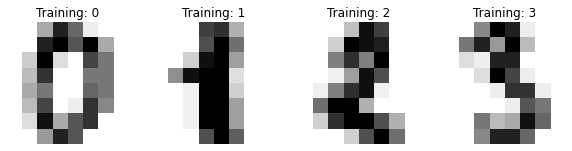

In [3]:
# đưa dữ liệu những hình ảnh vào digits
[1]
digits = datasets.load_digits() 

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


###**3. Chụp ảnh từ Webcame**

- Chương trình gọi Webcame máy tính

In [ ]:
[2]
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

- Chương trình sẽ chụp 10 lần vơi các số từ 0 đến 9, mỗi số chụp 6 lần.

In [ ]:
[2]
def create_testcase(digit):
    i = 0
    while i < 6:
      try:
        name = "so{0}_{1}.jpg".format(digit, i)
        filename = take_photo(filename=name)
        print('Saved to {}'.format(filename))
        # Hiển thị ảnh chụp.
        display(Image(filename))

        # Lưu ảnh chụp webcame vào drive
        img = cv2.imread("so{0}_{1}.jpg".format(digit, i))
        cv2.imwrite("/content/gdrive/MyDrive/cs114/digits/so{0}_{1}.jpg".format(digit, i), img)

      except Exception as err:
        # Lỗi sẽ được đưa ra nếu người dùng không có webcam hoặc nếu họ không có 
        # cấp quyền truy cập webcam đó.
        print(str(err))
      i += 1

# Gọi hàm mở webcame chụp từ 0 đến 9
create_testcase(0)
create_testcase(1)
create_testcase(2)
create_testcase(3)
create_testcase(4)
create_testcase(5)
create_testcase(6)
create_testcase(7)
create_testcase(8)
create_testcase(9)


###**4. Xử lý ảnh chụp**

####**4.1 Cắt vùng chứa chữ số** *(Bounding, Contour & Cropping)*


Sử dụng các hàm trong OpenCV, chương trình sẽ xác định vùng chứa chữ số trong ảnh chụp và cắt vùng chứa đó ra (ROI)

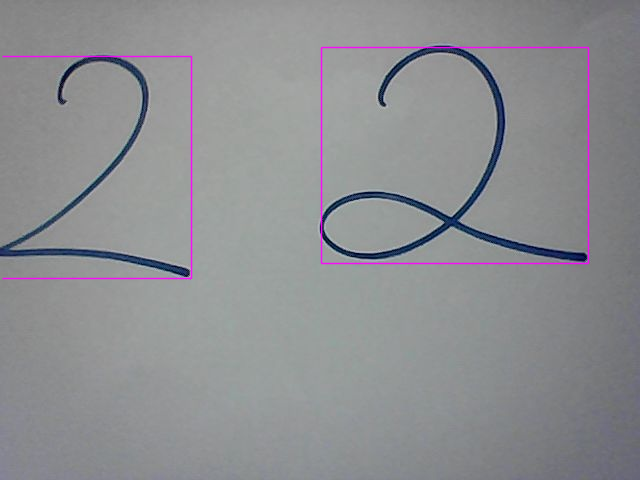

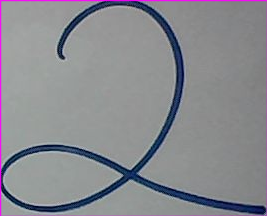

In [4]:
[3]
j = 0
digit = [0,1,2,3,4,5,6,7,8,9]
while j < 10:
  i = 0
  while i < 6:
    # Đọc hình ảnh từ drive với format đã quy định trong khi chụp
    img = cv2.imread("/content/gdrive/MyDrive/cs114/digits/so{0}_{1}.jpg".format(digit[j], i))
    # Chuyển các hình ảnh sang thang độ xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # (2) các phương pháp trong OpenCV phát hiện đổi tượng chủ yếu có màu trắng với nền là màu đen. 
    # Để xác định đổi tượng là chữ số, ta cần chuyển đổi giữa đối tượng và màu nền. 
    th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_OPEN, np.ones((2,2)))
    
    # (3) Tìm và lọc các đường bao chữ số, sau đó viền quay vòng bao chữ số đó đó
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    nh, nw = img.shape[:2]
    for cnt in cnts:
        # Hình chữ nhật giới hạn bởi các số đo
        x,y,w,h = bbox = cv2.boundingRect(cnt)
        if h < 0.3 * nh:
            continue
        # Vẽ đường viền quay vùng chữ số
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 1, cv2.LINE_AA)

        # cắt và lưu trữ ROI chữ số theo định dạng bằng cách sử dụng Numpy
        ROI = img[y:y+h, x:x+w]
        cv2.imwrite("/content/gdrive/MyDrive/cs114/digits/roi{0}_{1}.jpg".format(digit[j], i), ROI)

    # Hiển thị ví dụ xác định vùng ảnh chứa chữ số và cắt với ảnh so2_1.jpg
    if (j == 2 and i == 1):
      cv2_imshow(img)
      cv2_imshow(ROI)

    i += 1
      
  j += 1

####**4.2. Làm rõ ảnh** *(sharpening image)*
- Do chất lượng của Webcame của laptop có độ phân giải không đồng đều và không được tốt giữa các dòng máy. Thêm vào đó với việc chụp trong các điều kiện, môi trường thiếu ánh sáng sẽ khiến chất lượng ảnh kém và bị mờ. Vì thế cần một đoạn chương trình làm rõ ảnh mới chữ số mới cắt được.
- Ngoài ra việc xử lý ảnh rõ hơn ở bước này nhằm hỗ trợ cho việc chuyển đổi ảnh sang đen trắng ở bước tiếp theo được tốt hơn.


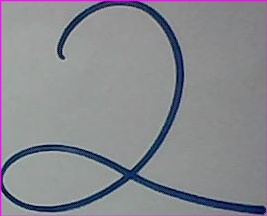

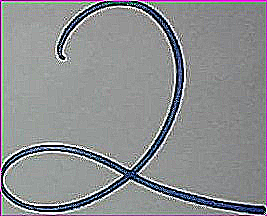

In [5]:
[4]
j = 0
digit = [0,1,2,3,4,5,6,7,8,9]
while j < 10:
  i = 0
  while i < 6:
    image = cv2.imread('/content/gdrive/MyDrive/cs114/digits/roi{0}_{1}.jpg'.format(digit[j], i))
    # Làm rõ ảnh với Kernel Sharpen
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(image, -1, sharpen_kernel)

    cv2.imwrite('/content/gdrive/MyDrive/cs114/digits/sharpen{0}_{1}.jpg'.format(digit[j], i), sharpen)

    # Ví dụ hiển trị làm rõ ảnh với ảnh so2_1.jpg
    if (j == 2 and i == 1):
      cv2_imshow(image)
      cv2_imshow(sharpen)

    i += 1
    
  j += 1


####**4.3. Chuyển ảnh Đen trắng** *(Converting image to Black and White)*

- Chuyển đổi hình ảnh vừa làm rõ ở **bước 4.2** sang màu đen và trắng với **OpenCV** có thể được thực hiện với một thao tác đơn giản **Binary thresholding** *(Ngưỡng nhị phân)*. Chúng ta chuyển đổi hình ảnh sang thang màu xám và xác định một **threshold value = 127** *(giá trị ngưỡng).* Đây là cách tiếp cận rất đơn giản, có thể không cho kết quả tốt nhất trong một số trường hợp. Ví dụ, hình ảnh có các điều kiện ánh sáng khác nhau ở các khu vực khác nhau.

- Có một cách tiếp cận tốt hơn trong các trường hợp ảnh có điều kiện sáng khác nhau. Đó là sử dụng **Adaptive Thresholding** *(Ngưỡng thích ứng)*. Cụ thể ta sử dụng **cv2.ADAPTIVE_THRESH_MEAN_C:** *Giá trị ngưỡng là giá trị trung bình của vùng lân cận trừ đi hằng số C*. **BlockSize** xác định kích thước của khu vực lân cận và C là một hằng số được trừ đi từ tổng trung bình hoặc tổng trọng số của các pixel lân cận.

- Chuyển vùng chứa chữ số vừa được làm rõ nét sang ảnh đen trắng. Mục đích để tạo điều kiện cho model nhận dạng một cách xác hơn.

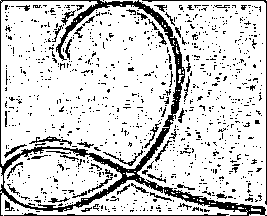

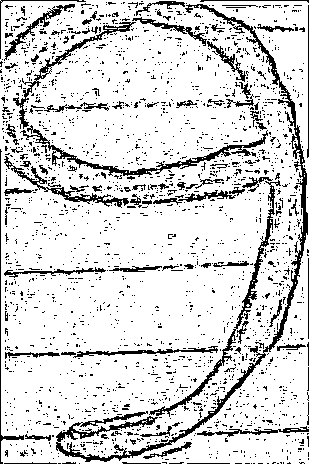

In [6]:
[5]
j = 0
digit = [0,1,2,3,4,5,6,7,8,9]
while j < 10:
  i = 0
  while i < 6:
    #đọc ảnh, đồng thời chuyển ảnh sang thang màu xám
    img = cv2.imread('/content/gdrive/MyDrive/cs114/digits/sharpen{0}_{1}.jpg'.format(digit[j], i), 0)
    img = cv2.medianBlur(img,5)

    img_AdaptiveMean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    
    #lưu hình ảnh theo định dạng
    cv2.imwrite('/content/gdrive/MyDrive/cs114/digits/roiBW{0}_{1}.jpg'.format(digit[j], i), img_AdaptiveMean) 

    # Ví dụ hiển trị bước chuyển ảnh sang đen trắng với ảnh so2_1.jpg và ảnh so9_1.jpg
    if ((j == 2 or j == 9) and i == 1):
      cv2_imshow(img_AdaptiveMean)

    i += 1
    
  j += 1

####**4.4. phóng to ảnh** *(Resized image)*

- Khi đã chuyển sang ảnh trắng đen, một vấn đề khác là vùng ảnh chứa chữ số được cắt ở bước trên có thể nhỏ, dẫn đến khi đưa ảnh về độ phân giải 8x8 pixel sẽ bị co lại rất nhỏ và mờ, ảnh hưởng đến nhận diện nên cần phóng to ảnh ra. Ngoài ra để tạo bước đệm cho bước tạo ảnh vuông cho ảnh đầu vào ở bước sau.

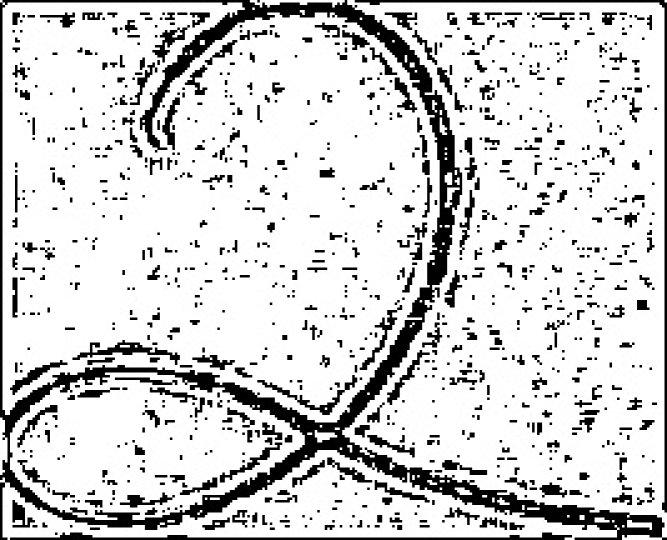

In [7]:
[6]
j = 0
digit = [0,1,2,3,4,5,6,7,8,9]
while j < 10:
  i = 0
  while i < 6:
    img = cv2.imread('/content/gdrive/MyDrive/cs114/digits/roiBW{0}_{1}.jpg'.format(digit[j], i))

    scale_percent = 250 #phần trăm phóng to với ảnh gốc đưa vào
    # Chiều dài
    width = int(img.shape[1] * scale_percent / 100)
    # Chiều rộng
    height = int(img.shape[0] * scale_percent / 100)

    # Kích thước dài và rộng của ảnh đầu ra
    dim = (width, height)
    
    # Thay đổi kích thước ảnh theo dim
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Lưu ảnh
    cv2.imwrite('/content/gdrive/MyDrive/cs114/digits/Resized_roiBW{0}_{1}.jpg'.format(digit[j], i), resized)

    # Ví dụ hiển thị bước phóng to ảnh với ảnh so2_1.jpg
    if (j == 2 and i == 1):
      cv2_imshow(resized)

    i += 1
  j += 1

####**4.5. Tạo ảnh vuông, giữ tỷ lệ ảnh ban đầu** *(Resize image to square, keeping ratio)*

- Do tập dữ liệu ảnh đầu vào được train bởi scikit-learn là 8x8 pixel là hình vuông. Tuy nhiên, việc cắt vùng chứa chữ số và phóng to ảnh đó ra không phải lúc nào cũng là hình vuông mà hầu hết sẽ là hình chữ nhật. Nếu ảnh là hình chữ nhật khi thay đổi kích thước về 8x8 pixel nhiều khả năng sẽ dẫn đến *ảnh bị méo* và mô hình có thể nhận diện sai từ những trường hợp này. 
- Vì thế cần một bước tạo ảnh có hình vuông từ tập ảnh đã xử lý ở các bước trước bằng cách thêm các cạnh trắng bao quanh ảnh và việc không làm thay đổi tỷ lệ kích thước ảnh đã phóng to ở bước trước. Cụ thể, thay đổi kích thước sẽ phải xuất ra **hình ảnh vuông (1: 1)**, với:

  * Hình ảnh đã thay đổi kích thước căn giữa theo chiều dọc.
  * Tỷ lệ khung hình được duy trì.
  * Các pixel còn lại được hiển thị màu trắng.

In [8]:
[7]
#from PIL import Image as ImagePIL

# fill_color=(255, 255, 255, 0) sẽ tạo vùng ảnh trắng xung quảnh ảnh đưa vào
def make_square(im, min_size=500, fill_color=(255, 255, 255, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = ImagePIL.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

j = 0
digit = [0,1,2,3,4,5,6,7,8,9]
while j < 10:
  i = 0
  while i < 6:
    test_image = ImagePIL.open('/content/gdrive/MyDrive/cs114/digits/Resized_roiBW{0}_{1}.jpg'.format(digit[j], i))
    new_image = make_square(test_image)
    # Ảnh được lưu dưới định dạng .png, bởi vì hệ mầu RGBA không hỗ trợ cho việc lưu ảnh .jpg
    new_image = new_image.save('/content/gdrive/MyDrive/cs114/digits/square_ResizedRoiBW{0}_{1}.png'.format(digit[j], i))

    i += 1
  j+= 1

###**5. Phân loại** *(Classification)*

- Để áp dụng bộ phân loại trên dữ liệu này, chúng ta cần làm phẳng các hình ảnh, chuyển từng mảng 2-D các giá trị thang độ xám từ hình dạng (8, 8) thành hình dạng (64,). Sau đó, toàn bộ tập dữ liệu sẽ có hình dạng (n_samples, n_features), trong đó n_samples là số lượng hình ảnh và n_features là tổng số pixel trong mỗi hình ảnh.

- Sau đó, chúng tôi có thể chia dữ liệu thành các tập con huấn luyện và thử nghiệm và phù hợp với bộ phân loại vectơ hỗ trợ trên các mẫu tàu. Sau đó, bộ phân loại phù hợp có thể được sử dụng để dự đoán giá trị của chữ số cho các mẫu trong tập con thử nghiệm.

- Đây là phần mà Scikit-learn đã hỗ trợ 

In [9]:
[1]
# làm phẳng hình ảnh
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Tạo bộ phân loại: bộ phân loại vectơ hỗ trợ
clf = svm.SVC(gamma=0.001)

# Chia tập dữ liệu thành 2 phần: 50% tập con huấn luyện và 50% tập con thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Học những chữ số trên tập con huấn luyện
clf.fit(X_train, y_train)

# Dự đoán các giá trị của chữ số trên tập con thử nghiệm
predicted = clf.predict(X_test)


Dưới đây, Ví dụ về 4 mẫu thử nghiệm đầu tiên và hiển thị giá trị chữ số dự đoán của chúng.
Bên cạnh đó là dòng lệnh in ra mảng của 4 ví dụ thử nghiệm đầu tiên này.

[[ 0.  0.  1. 11. 14. 15.  3.  0.]
 [ 0.  1. 13. 16. 12. 16.  8.  0.]
 [ 0.  8. 16.  4.  6. 16.  5.  0.]
 [ 0.  5. 15. 11. 13. 14.  0.  0.]
 [ 0.  0.  2. 12. 16. 13.  0.  0.]
 [ 0.  0.  0. 13. 16. 16.  6.  0.]
 [ 0.  0.  0. 16. 16. 16.  7.  0.]
 [ 0.  0.  0. 11. 13. 12.  1.  0.]]
[[ 0.  0.  6. 14. 16.  5.  0.  0.]
 [ 0.  2. 16. 16. 16.  7.  0.  0.]
 [ 0.  2. 15. 16. 15.  2.  0.  0.]
 [ 0.  0.  6. 16. 15.  7.  0.  0.]
 [ 0.  0. 14. 10.  6. 16.  3.  0.]
 [ 0.  1. 16.  3.  0. 16.  7.  0.]
 [ 0.  0. 10. 11. 11. 15.  3.  0.]
 [ 0.  0.  3. 14. 16.  6.  0.  0.]]
[[ 0.  0.  0.  4. 15.  6.  0.  0.]
 [ 0.  0.  0. 13. 13.  1.  0.  0.]
 [ 0.  0.  7. 16.  2.  0.  0.  0.]
 [ 0.  4. 15.  8.  0.  5.  0.  0.]
 [ 0. 11. 14.  1.  6. 16.  5.  0.]
 [ 1. 16. 14. 12. 16. 16.  3.  0.]
 [ 0. 10. 12. 10. 16. 10.  0.  0.]
 [ 0.  0.  0.  6. 16.  2.  0.  0.]]
[[ 0.  0.  1.  9. 15. 11.  3.  0.]
 [ 0.  0. 12.  9.  1. 11.  6.  0.]
 [ 0.  0. 13.  7.  6. 16.  8.  0.]
 [ 0.  0.  4. 10. 12. 15.  4.  0.]
 [ 0.  0.  0.  0.

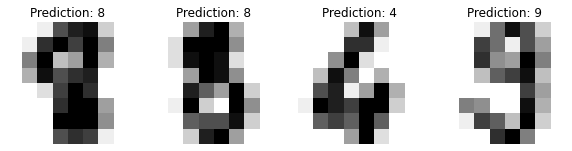

In [10]:
[1]
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

    # In ra mảng các 4 ví dụ
    print(np.array(image))

**Classification report** xây dựng một báo cáo văn bản hiển thị các số liệu phân loại chính.

In [11]:
[1]
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Chúng ta cũng có thể vẽ một **Confusion matrix** giữa các giá trị chữ số thực và giá trị chữ số dự đoán

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


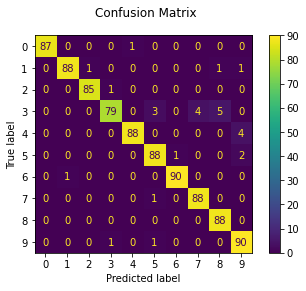

In [12]:
[1]
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

- Câu hỏi là việc in ra mảng của 4 ví dụ này có ý nghĩa gì? Cái quan trọng nhất đó là các mảng của 4 ví dụ này cho ta một hình dung về việc mà mô hình sử dụng dự đoán chữ số. Với những nét đậm, cái phần tử tương ứng trong mảng sẽ được biểu diễn bằng các số nguyên gần với số 16. Những vùng trắng được được biểu diễn bằng các số nguyên gần 0.
- Điều này quan trọng bởi ta có thể nắm bắt được việc mảng của dự liệu X_train và X_test là như thế nào để chỉnh sửa mảng của tập dữ liệu thực tế phù hợp.

###**6. Kiểm tra mô hình dự đoán với tập ảnh đầu vào thực tế**

Digit: 0


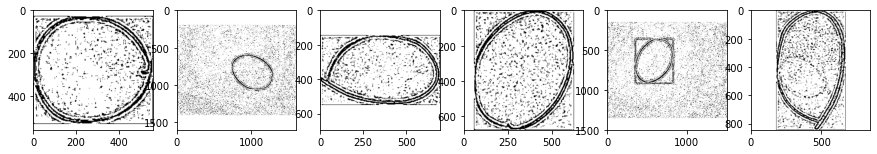

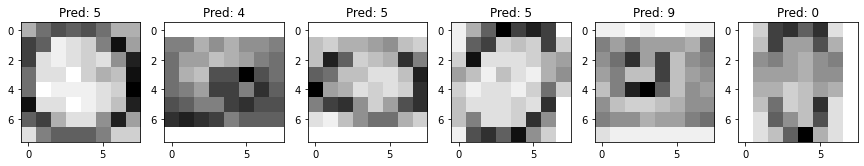

accuracy: [0.16666667]

Digit: 1


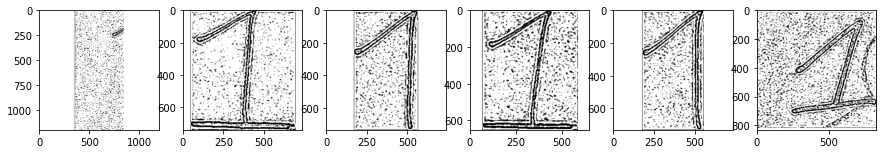

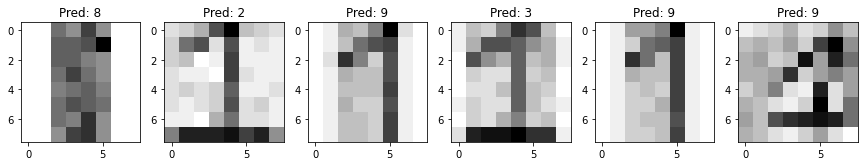

accuracy: [0.]

Digit: 2


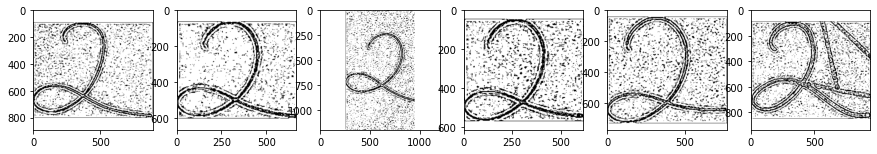

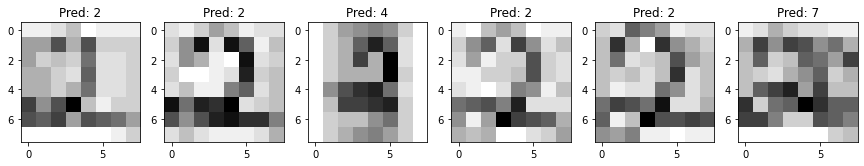

accuracy: [0.66666667]

Digit: 3


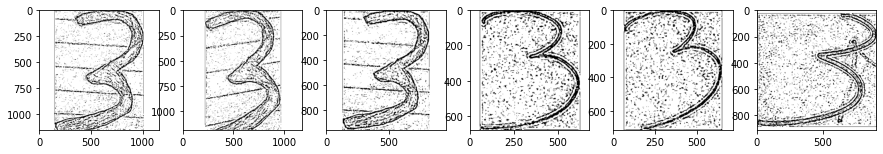

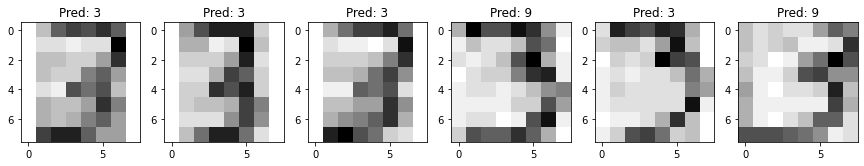

accuracy: [0.66666667]

Digit: 4


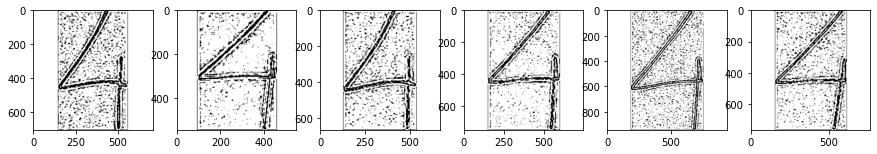

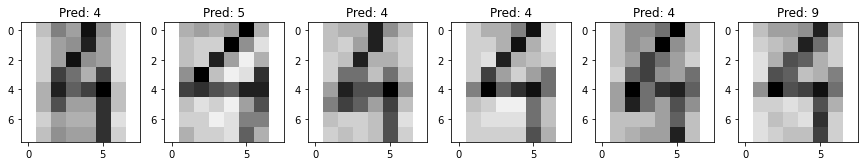

accuracy: [0.66666667]

Digit: 5


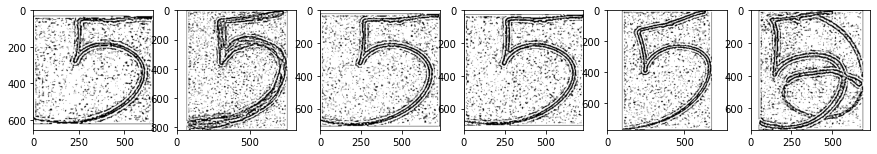

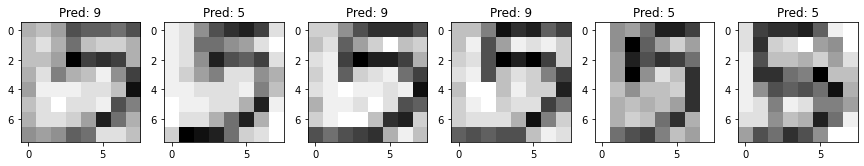

accuracy: [0.5]

Digit: 6


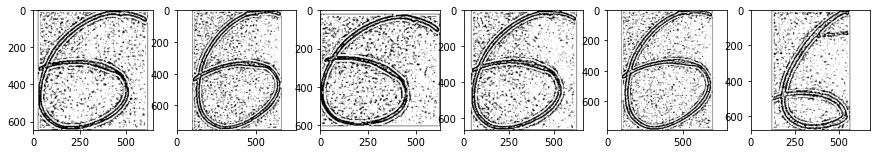

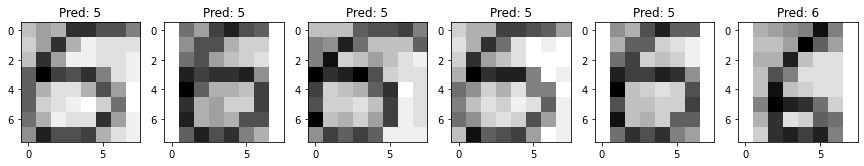

accuracy: [0.16666667]

Digit: 7


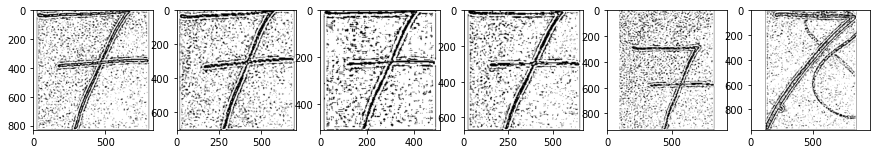

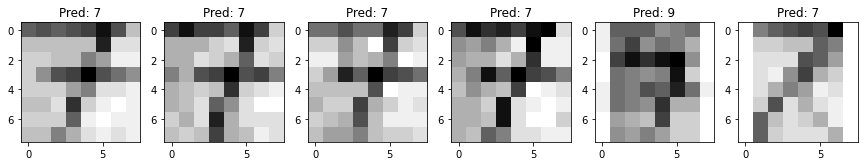

accuracy: [0.83333333]

Digit: 8


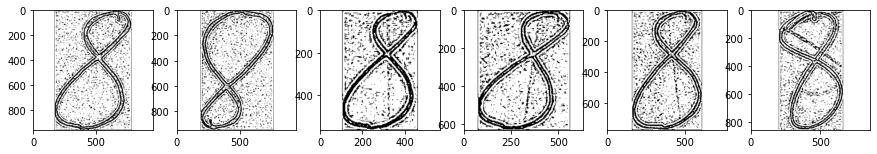

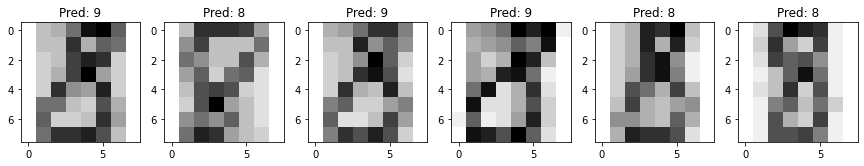

accuracy: [0.5]

Digit: 9


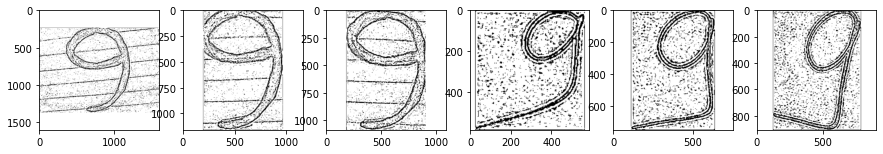

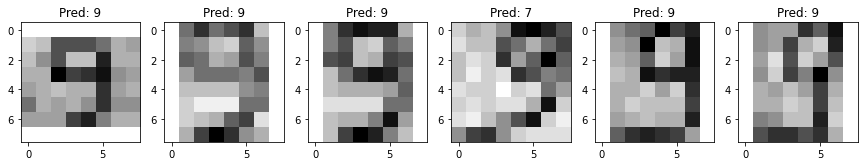

accuracy: [0.83333333]



In [13]:
def preprocess(image):
    # Chuyển ảnh thang màu RGB sang thang màu xám
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

# Hàm dự đoán chữ số và hiển thị kết quả
def predict_and_show(digit):
    print("Digit:", digit)

    # Danh sách input để lưu các ảnh đầu vào 
    input = []
    i = 0
    while i < 6:
      image_path = "/content/gdrive/MyDrive/cs114/digits/square_ResizedRoiBW{0}_{1}.png".format(digit, i)
      inputImage = cv2.imread(image_path)
      inputImage = preprocess(inputImage)
      input.append(inputImage)
      i += 1

    # Hiển thị ảnh đã lưu trong danh sách input được tạo trước đó
    fig_input, axs = plt.subplots(1, 6, figsize=(15,15))
    i = 0
    while i < 6:
      axs[i].imshow(input[i], 'gray')
      i += 1
    plt.show()

    # Thêm kết quả dự đoán vào danh sách cho hình ảnh đầu vào thứ i
    output = [] 
    i = 0
    while i < 6:
      
      # Thay đổi kích thước hình dạng của hình ảnh đầu vào thứ i thành 8x8
      input[i] = cv2.resize(input[i], (8, 8), interpolation = cv2.INTER_AREA)
      
      # chuẩn hóa giá trị của mỗi pixel trong phạm vi từ 0 đến 16
      input[i] = cv2.normalize(input[i], None, 0, 16, cv2.NORM_MINMAX)
      
      # Lưu giá trị chữ số vào danh sách output
      # Do mảng của ảnh đầu vào thực tế được viết đảo ngược so với X_train và X_test. (đen gần 0, trắng gần 15)
      # Nên cần chuyển lại bằng cách thực hiện input[i] = 16-input[i]
      output.append(clf.predict((16-input[i]).reshape(1, 64)))
      
      i += 1

    # show the output list that save in above part and corresponding input images
    fig_output, axs_output = plt.subplots(1, 6, figsize=(15,15))
    i = 0
    while i < 6:
      axs_output[i].title.set_text("Pred: {0}".format(int(output[i])))
      axs_output[i].imshow(input[i], 'gray')
      i += 1
    plt.show()

    # show the true prediction probability 
    i, probability = 0, 0
    while i < 6:
        probability += (output[i] == digit)
        i += 1
    print("accuracy: {0}\n".format(probability / 6))

    # show the true prediction probability 
    # end showing the output
# end define funcion

predict_and_show(0)
predict_and_show(1)
predict_and_show(2)
predict_and_show(3)
predict_and_show(4)
predict_and_show(5)
predict_and_show(6)
predict_and_show(7)
predict_and_show(8)
predict_and_show(9)


##**IV. KẾT LUẬN VÀ ĐÁNH GIÁ**

1. ***Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?***
- Mô hinh khi chạy thực tế với webcam của laptop và giấy viết tay cho lại kết quả tốt.

2. ***Ủa mà nhìn vào đâu để kết luận là tốt hay không?***
* Từ kết quả chạy thực nghiệm với các test case khác nhau nhưng cùng một chữ số
  * Số 0: đúng 1/6 -> accuracy: 0.167%
  * Số 1: đúng 0/6 -> accuracy: 0.0%
  * Số 2: đúng 4/6 -> accuracy: 0.667%
  * Số 3: đúng 4/6 -> accuracy: 0.667%
  * Số 4: đúng 4/6 -> accuracy: 0.667%
  * Số 5: đúng 3/6 -> accuracy: 0.5%
  * Số 6: đúng 1/6 -> accuracy: 0.167%
  * Số 7: đúng 5/6 -> accuracy: 0.833%
  * Số 8: đúng 3/6 -> accuracy: 0.5%
  * Số 9: đúng 5/6 -> accuracy: 0.833%

- nếu xét trên toàn bộ 60 bức ảnh của toàn bộ các testcase thì mô hình chỉ đoán đúng được 30/60 (0.5%), kết quả này thấp do số bức ảnh dự đoán đúng chưa được một nửa trên tổng số bức ảnh.

3. ***Nếu không tốt thì lý do tại sao?***
* Đầu tiên, nhóm cho rằng điều ảnh hưởng lớn nhất đến việc nhận diện là do chất lượng webcam của máy laptop và điều kiện ánh sáng tại nơi chụp ảnh. Ví dụ phần lớn những ảnh đầu vào kiểm tra (54 ảnh) trên được chụp ở dưới ánh sáng đèn huỳnh quang, nếu so với ánh sáng mặt trời thì ánh sáng đèn huỳnh quang tương đối gắt và khiến ảnh chụp bị ám xanh, gây ảnh hưởng bước nhận diện cắt vùng ảnh và chuyển ảnh sáng đen trắng (gây nhiễu).

  So sánh 54 ảnh trên với với 6 ảnh (ảnh 1, 2, 3 của chữ số 3 (hàng 5) và số 9 (hàng 17)) được chụp bằng webcam của laptop khác trong điều kiện ánh sáng khác. Rõ ràng 6 ảnh đó khi qua xử lý cho ảnh ra tốt, mô hình nhận diện đúng 6/6 ảnh. Đó là ví dụ cho sự khạc biệt về chất lượng webcam và điều kiện chụp.


* Thứ hai, Do bước xử lý **4.1 Cắt vùng chứa chữ số** *(Bounding, Contour & Cropping)* thực hiện không tốt. 
  * Ví dụ cụ thể:
    * Số 0 - ảnh 2, 4 (hàng thứ 1)
    * Số 1 - ảnh 1 (hàng thứ 3)
  
  * Các trường hợp cắt vùng ảnh không tốt sẽ chia làm 2 loại:
    * **Loại 1:** *cắt không đúng vùng chứa chữ số*. Ví dụ ảnh 1 của chữ số 1 (hàng thứ 3).

    * **Loại 2:** *xác định đúng vùng chữ số nhưng không cắt đúng*. Ví dụ ảnh 2, 5 của chữ số 0 (hàng thứ 1)

  * Nguyên nhân do ánh sáng không đồng đều, do chụp ảnh có cái đối tượng khác dính vào hoặc chụp vào nền ngoài đằng sau tờ giấy. Ngoài ra việc cắt ảnh được thực hiện chưa tới, tại bước xử lý cắt vùng chứa chữ số, chương trình nhận diện được các đổi tượng có thể có trong ảnh, tuy nhiên việc lựa chọn đối tượng nào mới là chữ số vẫn không thực hiện tốt.

* Thứ ba, do lỗi từ việc viết chữ số và góc nghiêng chụp ảnh. Cụ thể: 
  * *Viết số chưa đúng nét*: Ví dụ hàng chữ số 0 
  * *Không đậm, nét nhỏ, mảnh*: Hầu hết các ảnh (54 ảnh) được viết bằng bút lông mực xanh trên giấy trắng A4 nên chữ có thể bị nhỏ nét, lem mực (ảnh 5 chữ số 2 và số 7). Ví dụ với 6 (ảnh 1, 2, 3 của chữ số 3 (hàng 5) và số 9 (hàng 17)) nét to nên việc nhận diện chính xác được đảm bảo hơn.
  * Ngoài ra cũng có thể dó *ảnh chụp bị nghiêng*: Ví dụ ảnh 3, 4 của chữ số 0; ảnh 1, 3 của chữ số 6; ảnh 4 của chữ số 8.

4. ***Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?***
- Ta có thể áp dụng nó vô các mô hình phức tạp hơn, bằng việc xử lý tốt hơn đoạn chương trình tìm và cắt các khung hình chứa chữ số và kết hợp thêm một số bước tiền xử lý dữ liệu, sau đó đưa từng khung hình đã qua xử lý đó vào mô hình để nhận diện chữ số, sau đó ghép kết quả của từng khung hình lại ta sẽ có được kết quả cuối cùng.
